In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Unemployment in India file.csv")
df

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [3]:
df.isnull().sum()

Region                           14
 Date                            14
 Frequency                       14
Unemployment rate                14
Employed                         14
Labour Participation Rate (%)    14
Area                             14
dtype: int64

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(740, 7)

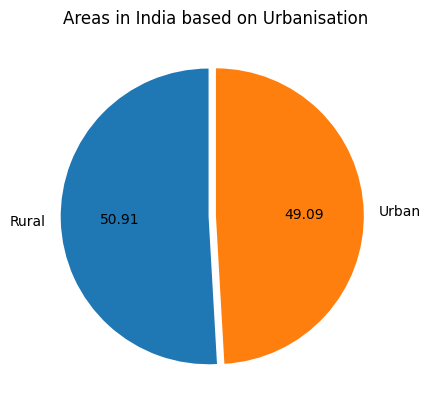

In [5]:
df_urbanisation = df.drop_duplicates(subset=["Region", "Area"], keep="last")
plt.pie(df_urbanisation["Area"].value_counts(), labels=["Rural", "Urban"], autopct="%0.2f", explode=[0.05,0], startangle=90)
plt.title("Areas in India based on Urbanisation")
plt.show()install

In [46]:
print(df_urbanisation["Area"].value_counts()[0])

28


In [6]:
df.sample(10)

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
248,Punjab,31-10-2019,Monthly,12.56,6021921.0,45.66,Rural
431,Chhattisgarh,30-09-2019,Monthly,9.46,2311507.0,46.80,Urban
152,Karnataka,31-10-2019,Monthly,7.13,12803527.0,43.10,Rural
719,Uttar Pradesh,31-12-2019,Monthly,12.37,13857200.0,40.21,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
708,Tripura,31-03-2020,Monthly,25.69,450271.0,63.56,Urban
736,Uttarakhand,31-03-2020,Monthly,8.15,889245.0,33.33,Urban
646,Rajasthan,31-07-2019,Monthly,11.67,5372470.0,40.38,Urban
374,Andhra Pradesh,30-06-2019,Monthly,3.80,4824630.0,36.76,Urban


In [43]:
df_urban = df[df["Area"] == "Urban"]
df_rural = df[df["Area"] == "Rural"]
df_urban

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area,Region and Area
373,Andhra Pradesh,31-05-2019,Monthly,6.09,4788661.0,37.45,Urban,Andhra Pradesh(Urban)
374,Andhra Pradesh,30-06-2019,Monthly,3.80,4824630.0,36.76,Urban,Andhra Pradesh(Urban)
375,Andhra Pradesh,31-07-2019,Monthly,5.64,4657443.0,36.10,Urban,Andhra Pradesh(Urban)
376,Andhra Pradesh,31-08-2019,Monthly,4.61,4743179.0,36.29,Urban,Andhra Pradesh(Urban)
377,Andhra Pradesh,30-09-2019,Monthly,6.01,4733996.0,36.69,Urban,Andhra Pradesh(Urban)
...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,West Bengal(Urban)
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,West Bengal(Urban)
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,West Bengal(Urban)
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,West Bengal(Urban)


# Average unemployment rate in India from 31-05-2019 to 30-06-2020

In [42]:
np.mean(df["Unemployment rate"])

11.787945945945946

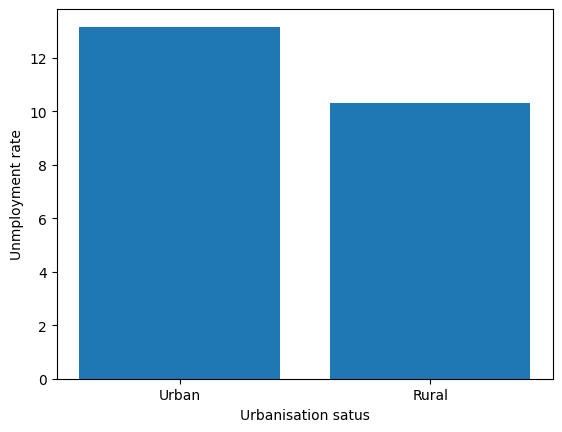

In [9]:
plt.bar(["Urban", "Rural"], [np.mean(df_urban["Unemployment rate"]), np.mean(df_rural["Unemployment rate"])])
plt.xlabel("Urbanisation satus")
plt.ylabel("Unmployment rate")
plt.show()

# Regions with highest unemployment as on 30-06-2020

In [10]:
df_high_u = df[df[" Date"] == '30-06-2020'].sort_values("Unemployment rate", ascending=False).head(5)
df_high_u

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area
107,Haryana,30-06-2020,Monthly,35.57,4357835.0,48.53,Rural
494,Haryana,30-06-2020,Monthly,29.41,2304138.0,38.09,Urban
174,Kerala,30-06-2020,Monthly,27.66,3952088.0,37.01,Rural
711,Tripura,30-06-2020,Monthly,27.47,391015.0,56.17,Urban
440,Chhattisgarh,30-06-2020,Monthly,27.07,1602231.0,39.41,Urban


In [11]:
df_high_u["Region and Area"] = df_high_u["Region"] + "(" + df_high_u["Area"] + ")"
df_high_u

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area,Region and Area
107,Haryana,30-06-2020,Monthly,35.57,4357835.0,48.53,Rural,Haryana(Rural)
494,Haryana,30-06-2020,Monthly,29.41,2304138.0,38.09,Urban,Haryana(Urban)
174,Kerala,30-06-2020,Monthly,27.66,3952088.0,37.01,Rural,Kerala(Rural)
711,Tripura,30-06-2020,Monthly,27.47,391015.0,56.17,Urban,Tripura(Urban)
440,Chhattisgarh,30-06-2020,Monthly,27.07,1602231.0,39.41,Urban,Chhattisgarh(Urban)


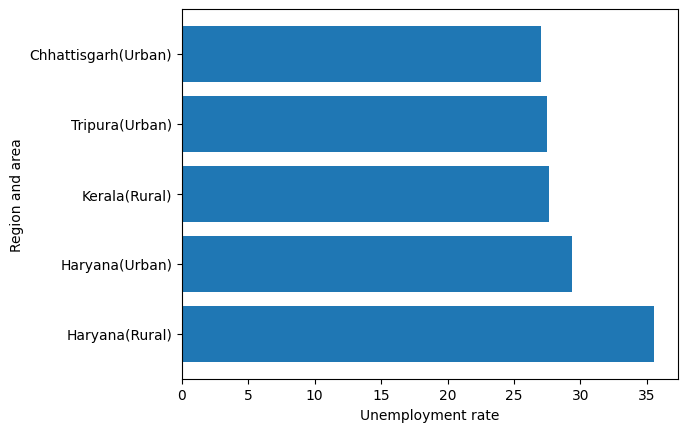

In [12]:
fig, graph = plt.subplots()
graph.barh(df_high_u["Region and Area"], df_high_u["Unemployment rate"])
fig.subplots_adjust()
plt.ylabel("Region and area")
plt.xlabel("Unemployment rate")
plt.show()

# Regions with lowest unemployment as on 30-06-2020

In [13]:
df_low_u = df[df[" Date"] == '30-06-2020'].sort_values("Unemployment rate", ascending=True).head(5)
df_low_u

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area
25,Assam,30-06-2020,Monthly,0.00,7544937.0,34.38,Rural
13,Andhra Pradesh,30-06-2020,Monthly,0.85,15572975.0,53.76,Rural
121,Himachal Pradesh,30-06-2020,Monthly,1.12,2230075.0,41.20,Rural
216,Meghalaya,30-06-2020,Monthly,1.35,1150200.0,64.63,Rural
93,Gujarat,30-06-2020,Monthly,1.41,13243922.0,47.72,Rural


In [14]:
df_low_u["Region and Area"] = df_low_u["Region"] + "(" + df_low_u["Area"] + ")"
df_low_u

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area,Region and Area
25,Assam,30-06-2020,Monthly,0.00,7544937.0,34.38,Rural,Assam(Rural)
13,Andhra Pradesh,30-06-2020,Monthly,0.85,15572975.0,53.76,Rural,Andhra Pradesh(Rural)
121,Himachal Pradesh,30-06-2020,Monthly,1.12,2230075.0,41.20,Rural,Himachal Pradesh(Rural)
216,Meghalaya,30-06-2020,Monthly,1.35,1150200.0,64.63,Rural,Meghalaya(Rural)
93,Gujarat,30-06-2020,Monthly,1.41,13243922.0,47.72,Rural,Gujarat(Rural)


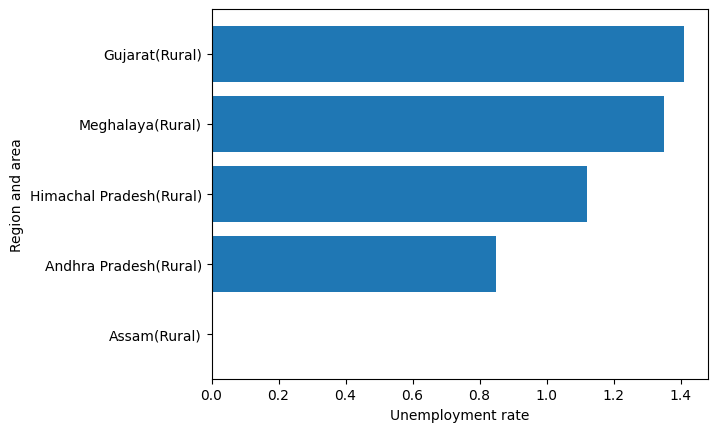

In [15]:
fig, graph = plt.subplots()
graph.barh(df_low_u["Region and Area"], df_low_u["Unemployment rate"])
fig.subplots_adjust()
plt.ylabel("Region and area")
plt.xlabel("Unemployment rate")
plt.show()

# Lowest and highest ever unemployment rate

In [16]:
np.min(df["Unemployment rate"])

0.0

In [17]:
df["Region and Area"] = df["Region"] + "(" + df["Area"] + ")"
df

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area,Region and Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,Andhra Pradesh(Rural)
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,Andhra Pradesh(Rural)
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,Andhra Pradesh(Rural)
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,Andhra Pradesh(Rural)
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,Andhra Pradesh(Rural)
...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,West Bengal(Urban)
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,West Bengal(Urban)
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,West Bengal(Urban)
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,West Bengal(Urban)


In [18]:
df[df["Unemployment rate"] == np.min(df["Unemployment rate"])][["Region and Area", " Date", "Unemployment rate"]]

,Region and Area,Date,Unemployment rate
25,Assam(Rural),30-06-2020,0.0
51,Chhattisgarh(Rural),30-04-2020,0.0
77,Goa(Rural),29-02-2020,0.0
231,Puducherry(Rural),31-05-2019,0.0
232,Puducherry(Rural),30-06-2019,0.0
233,Puducherry(Rural),31-07-2019,0.0
235,Puducherry(Rural),30-09-2019,0.0
237,Puducherry(Rural),30-11-2019,0.0
274,Sikkim(Rural),30-04-2020,0.0
617,Puducherry(Urban),30-06-2019,0.0


# Maximum unemployment rate

In [19]:
df[df["Unemployment rate"] == np.max(df["Unemployment rate"])][["Region and Area", " Date", "Unemployment rate"]]

,Region and Area,Date,Unemployment rate
627,Puducherry(Urban),30-04-2020,76.74


# Important lists

In [20]:
regions = df["Region"].unique()
regions

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [21]:
dates = df[" Date"].unique()
dates

array(['31-05-2019', '30-06-2019', '31-07-2019', '31-08-2019',
       '30-09-2019', '31-10-2019', '30-11-2019', '31-12-2019',
       '31-01-2020', '29-02-2020', '31-03-2020', '30-04-2020',
       '31-05-2020', '30-06-2020'], dtype=object)

In [22]:
area = df["Area"].unique()
area

array(['Rural', 'Urban'], dtype=object)

# Important functions

In [23]:
def get_unemp_rate(region, area, date):
    return df[(df["Area"] == area) & (df["Region"] == region) & (df[" Date"] == date)]["Unemployment rate"]

In [24]:
get_unemp_rate("West Bengal", "Urban", "30-06-2020")

753    9.86
Name: Unemployment rate, dtype: float64

In [25]:
def get_employed(region, area, date):
    return df[(df["Area"] == area) & (df["Region"] == region) & (df[" Date"] == date)]["Employed"]

In [26]:
get_employed("West Bengal", "Urban", "30-06-2020")

753    9088931.0
Name: Employed, dtype: float64

In [27]:
def get_labour_part_rate(region, area, date):
    return df[(df["Area"] == area) & (df["Region"] == region) & (df[" Date"] == date)]["Labour Participation Rate (%)"]

In [28]:
get_labour_part_rate("West Bengal", "Urban", "30-06-2020")

753    37.57
Name: Labour Participation Rate (%), dtype: float64

# Line graph unemployment rate change per region and area

In [29]:
def get_dates_for_graph(region, dev_status):
    return df[(df["Region"] == region) & (df["Area"] == dev_status)][" Date"]

In [30]:
def get_unemp_rate_for_graph(region, dev_status):
    return df[(df["Region"] == region) & (df["Area"] == dev_status)]["Unemployment rate"]

In [31]:
print(get_dates_for_graph("West Bengal", "Rural"))

345    31-05-2019
346    30-06-2019
347    31-07-2019
348    31-08-2019
349    30-09-2019
350    31-10-2019
351    30-11-2019
352    31-12-2019
353    31-01-2020
354    29-02-2020
355    31-03-2020
356    30-04-2020
357    31-05-2020
358    30-06-2020
Name:  Date, dtype: object


In [32]:
print(get_unemp_rate_for_graph("Odisha", "Urban"))

602     2.95
603     2.63
604     1.78
605     3.50
606     3.78
607     4.50
608     2.23
609     3.36
610     2.28
611     2.19
612     3.96
613    20.50
614    10.00
615     2.18
Name: Unemployment rate, dtype: float64


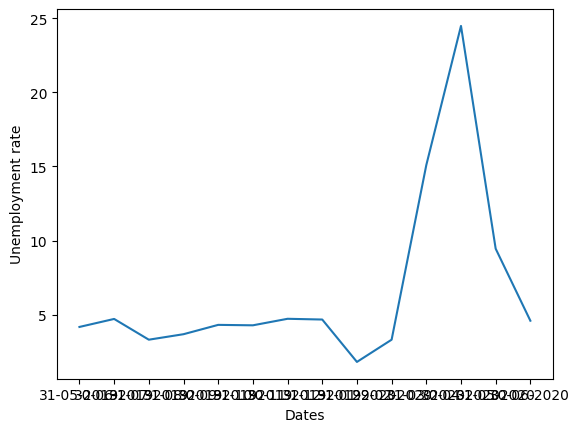

In [33]:
plt.plot(get_dates_for_graph("Odisha", "Rural"), get_unemp_rate_for_graph("Odisha", "Rural"))
plt.xlabel("Dates")
plt.ylabel("Unemployment rate")
plt.show()

# Highest employed per region and area as on 30-06-2020

In [47]:
df_high_e = df[df[" Date"] == '30-06-2020'].sort_values("Employed", ascending=False).head(5)
df_high_e

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area,Region and Area
331,Uttar Pradesh,30-06-2020,Monthly,8.51,41908909.0,36.89,Rural,Uttar Pradesh(Rural)
202,Maharashtra,30-06-2020,Monthly,9.40,23601016.0,48.34,Rural,Maharashtra(Rural)
358,West Bengal,30-06-2020,Monthly,4.94,21225887.0,40.44,Rural,West Bengal(Rural)
39,Bihar,30-06-2020,Monthly,20.49,20622566.0,37.40,Rural,Bihar(Rural)
188,Madhya Pradesh,30-06-2020,Monthly,6.46,16748971.0,41.50,Rural,Madhya Pradesh(Rural)


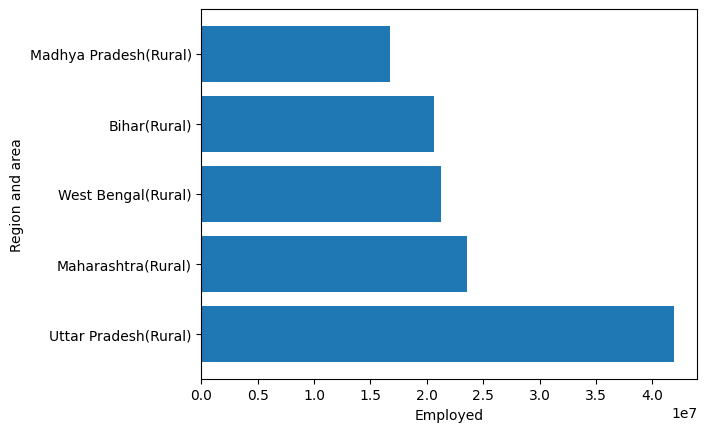

In [35]:
plt.barh(df_high_e["Region and Area"], df_high_e["Employed"])
plt.ylabel("Region and area")
plt.xlabel("Employed")
plt.show()

# Lowest employed per region and area as on 30-06-2020

In [36]:
df_low_e = df[df[" Date"] == '30-06-2020'].sort_values("Employed").head(5)
df_low_e

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area,Region and Area
669,Sikkim,30-06-2020,Monthly,2.63,76269.0,35.85,Urban,Sikkim(Urban)
67,Delhi,30-06-2020,Monthly,21.14,112108.0,29.22,Rural,Delhi(Rural)
275,Sikkim,30-06-2020,Monthly,5.81,141313.0,42.36,Rural,Sikkim(Rural)
508,Himachal Pradesh,30-06-2020,Monthly,10.81,224902.0,40.66,Urban,Himachal Pradesh(Urban)
629,Puducherry,30-06-2020,Monthly,4.55,234926.0,29.73,Urban,Puducherry(Urban)


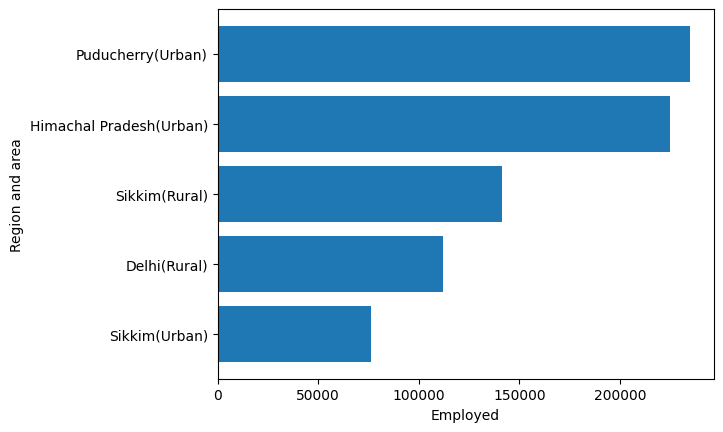

In [37]:
plt.barh(df_low_e["Region and Area"], df_low_e["Employed"])
plt.ylabel("Region and area")
plt.xlabel("Employed")
plt.show()

# Lowest Labour participation rate per region and area as on 30-06-2020

In [38]:
df_low_l = df[df[" Date"] == '30-06-2020'].sort_values("Labour Participation Rate (%)").head(5)
df_low_l

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area,Region and Area
67,Delhi,30-06-2020,Monthly,21.14,112108.0,29.22,Rural,Delhi(Rural)
629,Puducherry,30-06-2020,Monthly,4.55,234926.0,29.73,Urban,Puducherry(Urban)
289,Tamil Nadu,30-06-2020,Monthly,2.06,10169115.0,31.49,Rural,Tamil Nadu(Rural)
683,Tamil Nadu,30-06-2020,Monthly,24.93,7741005.0,31.60,Urban,Tamil Nadu(Urban)
344,Uttarakhand,30-06-2020,Monthly,10.71,1675441.0,32.00,Rural,Uttarakhand(Rural)


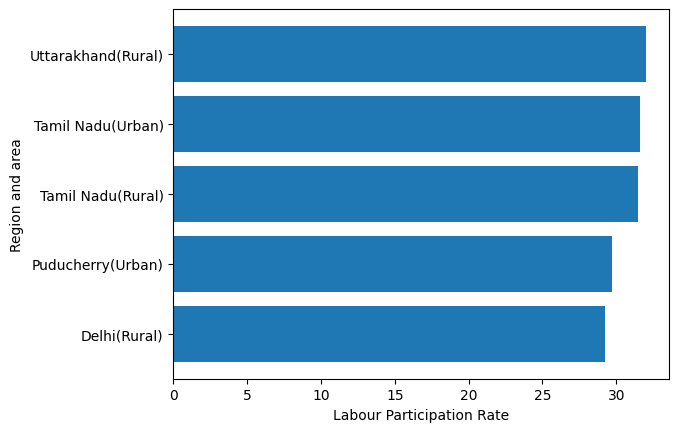

In [39]:
plt.barh(df_low_l["Region and Area"], df_low_l["Labour Participation Rate (%)"])
plt.ylabel("Region and area")
plt.xlabel("Labour Participation Rate")
plt.show()

# Highest Labour participation rate per region and area as on 30-06-2020

In [40]:
df_high_l = df[df[" Date"] == '30-06-2020'].sort_values("Labour Participation Rate (%)", ascending=False).head(5)
df_high_l

,Region,Date,Frequency,Unemployment rate,Employed,Labour Participation Rate (%),Area,Region and Area
216,Meghalaya,30-06-2020,Monthly,1.35,1150200.0,64.63,Rural,Meghalaya(Rural)
317,Tripura,30-06-2020,Monthly,18.84,1106978.0,59.74,Rural,Tripura(Rural)
303,Telangana,30-06-2020,Monthly,19.30,8891181.0,58.97,Rural,Telangana(Rural)
711,Tripura,30-06-2020,Monthly,27.47,391015.0,56.17,Urban,Tripura(Urban)
13,Andhra Pradesh,30-06-2020,Monthly,0.85,15572975.0,53.76,Rural,Andhra Pradesh(Rural)


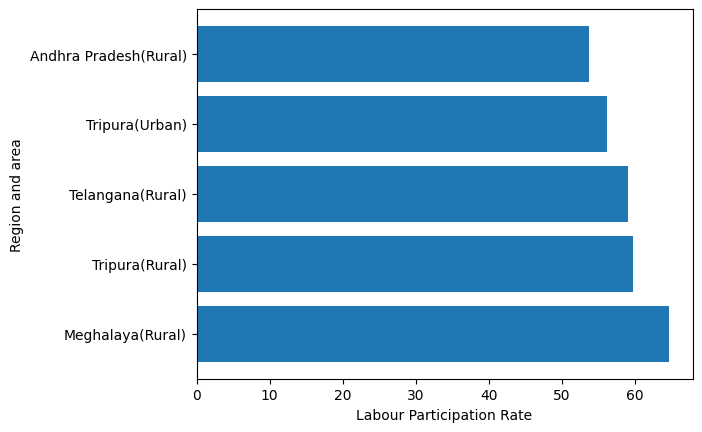

In [41]:
plt.barh(df_high_l["Region and Area"], df_high_l["Labour Participation Rate (%)"])
plt.ylabel("Region and area")
plt.xlabel("Labour Participation Rate")
plt.show()